# Analyzing indicators of energy supply and renewable electricity production from USA 2013

First, I'm going to load the energy data from the file assets/Energy Indicators.xls. This file contains various indicators related to energy supply and renewable electricity production from the United Nations for the year 2013. I'll store this data in a DataFrame called Energy.

Since this is an Excel file (not a CSV), I'll make sure to exclude any footer and header information. The first two columns aren't needed, so I'll remove them. I'll also rename the columns to:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']


I'll convert the 'Energy Supply' values from petajoules to gigajoules (remember, there are 1,000,000 gigajoules in a petajoule). For any missing data (denoted by "..."), I'll replace those with np.NaN values.

Next, I'll standardize some country names for consistency in later steps:

* "Republic of Korea" will be renamed to "South Korea"
* "United States of America" to "United States"
* "United Kingdom of Great Britain and Northern Ireland" to "United Kingdom"
* "China, Hong Kong Special Administrative Region" to "Hong Kong"

I'll also clean up any country names that include parentheses, like changing 'Bolivia (Plurinational State of)' to 'Bolivia', and remove any numeric digits from country names, such as changing 'Italy9' to 'Italy'.

Next, I'll load the GDP data from assets/world_bank.csv, which contains GDP information for various countries from 1960 to 2015. I'll store this in a DataFrame called GDP, skip the initial header, and rename some countries for consistency:

* "Korea, Rep." to "South Korea"
* "Iran, Islamic Rep." to "Iran"
* "Hong Kong SAR, China" to "Hong Kong"

Then, I'll load the Sciamgo Journal and Country Rank data from the file assets/scimagojr-3.xlsx, which ranks countries based on their journal contributions in the field of Energy Engineering and Power Technology. This will be stored in a DataFrame called ScimEn.

Finally, I'll join the three datasets (GDP, Energy, and ScimEn) using the intersection of country names. I'll use only the last 10 years (2006-2015) of GDP data and focus on the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The resulting DataFrame will have the country names as the index and the following columns: **bold text**['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This DataFrame will contain 20 columns and 15 entries, sorted by the "Rank" column.

In [25]:
def Step_one():

    import pandas as pd
    import numpy as np

    Energy = pd.read_excel('assets/Energy Indicators.xls', header=16,skipfooter=38)
    Energy=Energy.drop(columns=["Unnamed: 0","Unnamed: 1"])
    Energy=Energy.rename(columns={"Unnamed: 2":"Country","Energy Supply per capita":"Energy Supply per Capita","Renewable Electricity Production":"% Renewable"})
    Energy["Energy Supply"]=Energy["Energy Supply"].replace("...", np.NaN)
    Energy["Energy Supply"]=Energy["Energy Supply"]*1000000
    Energy["Country"]=Energy["Country"].str.replace(r"\(.*\)", "",regex=True).str.replace(r"\d+" , "",regex=True)
    Energy["Country"]=Energy["Country"].str.strip()
    Energy["Country"]=Energy["Country"].replace({"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"})
    GDP=pd.read_csv("assets/world_bank.csv",header=4)
    GDP=GDP.rename(columns={"Country Name":"Country"})
    GDP["Country"]=GDP["Country"].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"})
    ScimEn=pd.read_excel("assets/scimagojr-3.xlsx")
    GDP=GDP.filter(items=['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
    ScimEn= ScimEn[:15]
    df=pd.merge(ScimEn,Energy,how='left').merge(GDP)
    df=df.set_index("Country")
    return df
Step_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.96908,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.02028,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Step 2
In the previous step, I combined three datasets and then narrowed it down to the top 15 entries. Now, before I filtered it down to just those top 15 items, I need to find out how many entries were lost during the merging process.

To do this, I'll calculate the difference between the total number of entries before and after the merge. This will give me the number of entries that didn't make it into the final merged dataset.

This function will return a single number representing the count of entries lost during the merging process.

In [9]:
def Step_two():

    import pandas as pd
    import numpy as np

    Energy = pd.read_excel('assets/Energy Indicators.xls', header=16,skipfooter=38)
    Energy=Energy.drop(columns=["Unnamed: 0","Unnamed: 1"])
    Energy=Energy.rename(columns={"Unnamed: 2":"Country","Energy Supply per capita":"Energy Supply per Capita","Renewable Electricity Production":"% Renewable"},)
    Energy["Energy Supply"]=Energy["Energy Supply"].replace("...", np.NaN)
    Energy["Energy Supply"]=Energy["Energy Supply"]*1000000
    Energy["Country"]=Energy["Country"].str.replace(r"\(.*\)", "",regex=True).str.replace(r"\d+" , "",regex=True)
    Energy["Country"]=Energy["Country"].str.strip()
    Energy["Country"]=Energy["Country"].replace({"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"})
    GDP=pd.read_csv("assets/world_bank.csv",header=4)
    GDP=GDP.rename(columns={"Country Name":"Country"})
    GDP["Country"]=GDP["Country"].replace({"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"})
    ScimEn=pd.read_excel("assets/scimagojr-3.xlsx")
    GDP=GDP.filter(items=['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
    ScimEn= ScimEn[:15]
    df=pd.merge(ScimEn,Energy,how='left').merge(GDP)
    df=df.set_index("Country")


    df2=pd.concat([ScimEn,Energy,GDP])["Country"].unique()


    return len(df2)-len(df)
Step_two()

291

### Step 3

Next, I'll determine which countries have had the highest average GDP over the past 10 years. I'll calculate the average GDP for each country for the last decade, then identify the top 15 countries based on these averages.

This function will return a Series named avgGDP, which will include the top 15 countries and their average GDPs, sorted in descending order.

In [10]:
def Step_three():
    import pandas as pd

    top_15 = Step_one()
    top_15 = top_15.iloc[:,10:]
    avgGDP = top_15.mean(axis=1)

    return avgGDP.sort_values(ascending=False)
Step_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

### Step 4
Now, I'll look at the country with the 6th largest average GDP over the past 10 years and calculate how much its GDP has changed during this period. I'll find the difference between its GDP at the start and the end of the 10-year span.

This function will return a single number representing the GDP change for this country over the 10 years.

In [12]:
def Step_four():
    top10 = Step_three()
    top15 = Step_one()
    top15 = top15.iloc[:,10:]

    country = top10[top10 == top10[5]].index[0]

    diff = top15.loc[country]['2015'] - top15.loc[country]['2006']
    return diff
Step_four()

246702696075.3999

### Step 5
Next, I'll calculate the mean energy supply per capita. This will help us understand the average energy supply available per person.

This function will return a single number representing the mean energy supply per capita.

In [14]:
def Step_five():

    top15=Step_one()
    top15=top15['Energy Supply per Capita']
    avg_energy=top15.mean()
    return avg_energy
Step_five()

157.6

### Step 6
Next, I'll find out which country has the highest percentage of renewable energy and what that percentage is. This will identify the leader in renewable energy production.

This function will return a tuple containing the name of the country and the percentage of renewable energy.

In [15]:
def Step_six():

    t15=Step_one()
    t15=t15['% Renewable'].sort_values(ascending=False)

    return (t15.index[0], t15.iloc[0])

### Step 7
Now, I'll create a new column that represents the ratio of Self-Citations to Total Citations for each country. This ratio helps us understand how much a country's citations are self-referential compared to its total citations.

Next, I'll identify which country has the highest ratio in this new column and what that maximum ratio value is.

This function will return a tuple containing the name of the country with the highest ratio and the ratio value itself.

In [17]:
def Step_seven():
    t15=Step_one()
    t15['ratio']=t15['Self-citations']/t15['Citations']

    return (t15['ratio'].idxmax(), t15['ratio'].max())
Step_seven()

('China', 0.6893126179389422)

### Step 8

Next, I'll create a new column that estimates the population of each country using the Energy Supply and Energy Supply per capita data. This estimate will give us an approximation of each country's population based on its energy metrics.

After calculating this estimate, I'll determine which country ranks as the third most populous according to this calculation.

This function will return the name of the country that ranks third in estimated population based on energy metrics.

In [18]:
def Step_eight():
    t15=Step_one()
    t15["Estimated population"]=t15["Energy Supply"]/t15["Energy Supply per Capita"]

    return t15["Estimated population"].sort_values(ascending=False).index[2]
Step_eight()

'United States'

### Step 9
Now, I'll create a new column that estimates the number of citable documents per person for each country. This estimation will help us understand the scholarly output relative to population size.

Once the column is created, I'll calculate the correlation between the number of citable documents per capita and the energy supply per capita using the .corr() method, specifically using Pearson's correlation coefficient.

This function will return a single number representing the correlation between these two variables.

In [19]:
def Step_nine():

    top15 = Step_one()
    top15['Population Estimate'] = top15['Energy Supply']/top15['Energy Supply per Capita']
    top15['Citable Documents per Capita'] = top15['Citable documents']/top15['Population Estimate']

    top15['Citable Documents per Capita'] = top15['Citable Documents per Capita'].astype(float)
    top15['Energy Supply per Capita'] = top15['Energy Supply per Capita'].astype(float)

    return top15['Citable Documents per Capita'].corr(top15['Energy Supply per Capita'])
Step_nine()

0.7940010435442946

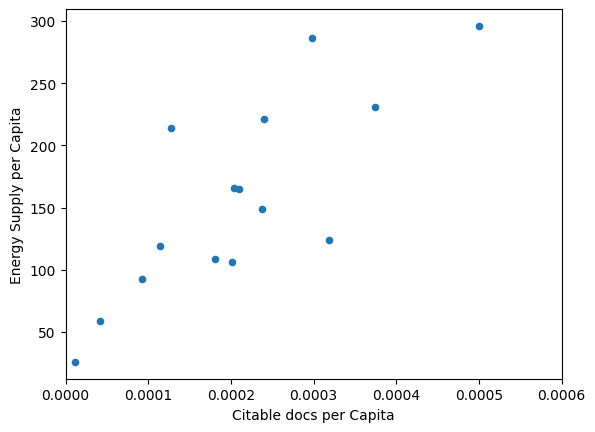

In [22]:
def plot9():
    import matplotlib as plt
    %matplotlib inline

    Top15 = Step_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot9()

### Step 10
Next, I'll create a new column that categorizes each country based on whether its % Renewable value is at or above the median value among all countries in the top 15. This categorization will help us identify which countries are leading in renewable energy adoption.

After creating this column, I'll return a series named HighRenew, where each entry corresponds to a country and indicates whether it meets the criteria (1 for above or at median, 0 for below median). The series will be sorted in ascending order of rank.

This function will provide insight into how countries in the top 15 rank in terms of renewable energy use compared to their peers.

In [23]:
def Step_ten():
    t15=Step_one()
    t15["HighRenew"]=[1 if x>=t15["% Renewable"].median() else 0 for x in t15["% Renewable"]]

    return t15["HighRenew"]
    raise NotImplementedError()
Step_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Step 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}
```

The DataFrame will have 'Continent' as the index, with categories including 'Asia', 'Australia', 'Europe', 'North America', and 'South America'. The columns will be named `['size', 'sum', 'mean', 'std']`.

This function will provide a summary view of population estimates across continents, offering insights into population distribution and variation among different regions of the world.

In [28]:
import numpy as np
import pandas as pd

def Step_eleven():
    # Assuming Step_one() returns a DataFrame 'top15'
    top15 = Step_one()

    ContinentDict = {'China': 'Asia',
                     'United States': 'North America',
                     'Japan': 'Asia',
                     'United Kingdom': 'Europe',
                     'Russian Federation': 'Europe',
                     'Canada': 'North America',
                     'Germany': 'Europe',
                     'India': 'Asia',
                     'France': 'Europe',
                     'South Korea': 'Asia',
                     'Italy': 'Europe',
                     'Spain': 'Europe',
                     'Iran': 'Asia',
                     'Australia': 'Australia',
                     'Brazil': 'South America'}

    top15['Continent'] = top15.index.map(ContinentDict)

    top15['Population Estimate'] = top15['Energy Supply'] / top15['Energy Supply per Capita']

    result = top15.set_index('Continent').groupby(level=0)['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    return result

Step_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


### Step 12
Next, I'll categorize the % Renewable values into 5 bins. Then, I'll group the top 15 countries by both their continent (using the provided ContinentDict) and these new % Renewable bins. This grouping will help us understand how renewable energy adoption varies across continents and within each bin category.

After grouping, I'll calculate how many countries belong to each group, excluding groups that have no countries.

This function will return a Series with a MultiIndex, where the first level is `Continent` and the second level corresponds to the bins for `% Renewable`. This will provide insights into how renewable energy adoption is distributed across continents and different levels of adoption.

In [29]:
import pandas as pd
import numpy as np

def Step_twelve():

    top15 = Step_one()
    ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}
    top15 = top15.reset_index()
    top15['Continent'] = [ContinentDict[country] for country in top15['Country']]
    top15['% Renewable'] = pd.cut(top15['% Renewable'],5)
    top15=top15.groupby(['Continent','% Renewable']).size()


    return top15

Step_twelve()


Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

### Step 13

Now, I'll convert the Population Estimate series into a string format with thousands separators (using commas). This conversion will ensure that the population estimates are presented clearly and comprehensibly.

Each value in the resulting series, named `PopEst`, will be a string representing the population estimate for each country, maintaining all significant digits without rounding.

This function will provide a clearer representation of population estimates, enhancing the readability and interpretation of the data.

In [30]:
def Step_thirteen():
    top15 = Step_one()

    top15['PopEst'] = (top15['Energy Supply']/top15['Energy Supply per Capita'])

    return top15['PopEst'].apply(lambda z: '{0:,}'.format(z)).astype(str)

Step_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

### Step 14

Next, I'll utilize the built-in function `plot()` to generate a visualization that demonstrates an example from our analysis. This function will help us visualize data trends or insights in a graphical format.

Ensure to execute the function as per the setup or course materials to explore and interpret the visual representation of our data analysis.

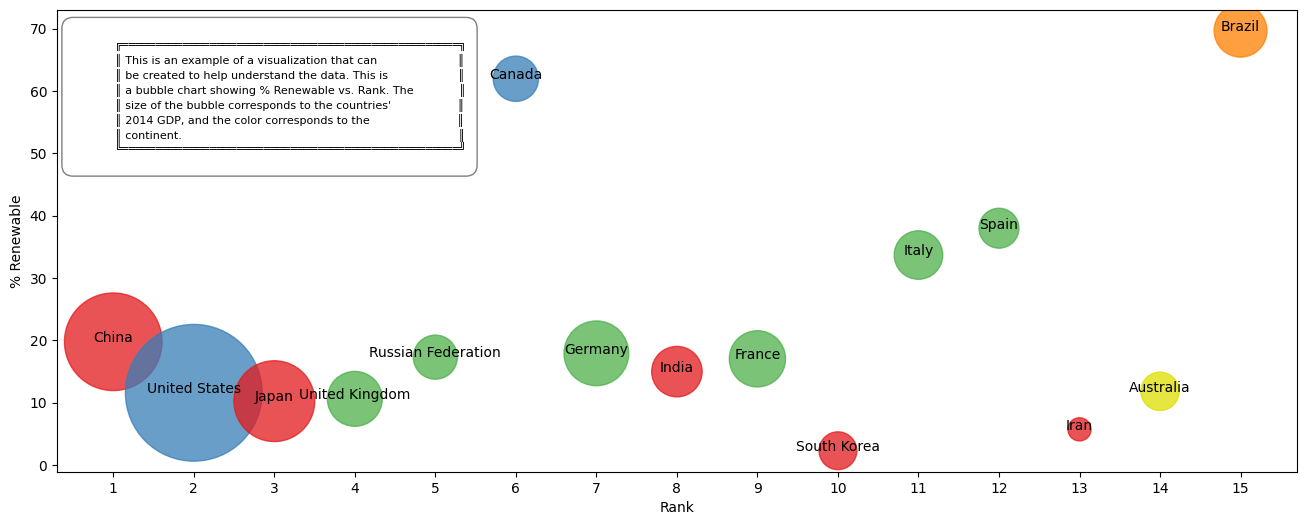

In [64]:
def Plot():
    import matplotlib.pyplot as plt
    %matplotlib inline
    Top15 = Step_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter',
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'],
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6])

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    # Add boxed text within the plot
    ax.text(0.5, 70,
            """
            ╔══════════════════════════════════════════════════╗
            ║ This is an example of a visualization that can                       ║
            ║ be created to help understand the data. This is                    ║
            ║ a bubble chart showing % Renewable vs. Rank. The             ║
            ║ size of the bubble corresponds to the countries'                   ║
            ║ 2014 GDP, and the color corresponds to the                         ║
            ║ continent.                                                                               ║
            ╚══════════════════════════════════════════════════╝
            """,
            fontsize=8, ha='left', va='top', bbox=dict(boxstyle='round,pad=1', facecolor='white', alpha=0.5))

Plot()